In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('compas.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

<AxesSubplot:xlabel='sex', ylabel='count'>

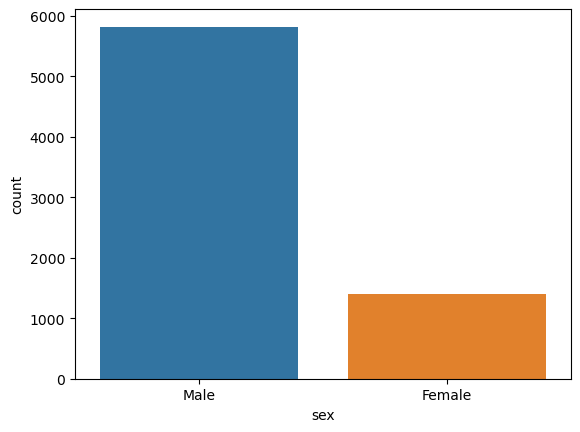

In [4]:
#C4

import seaborn as sns

sns.countplot(x=df['sex'])

<AxesSubplot:xlabel='age_cat', ylabel='count'>

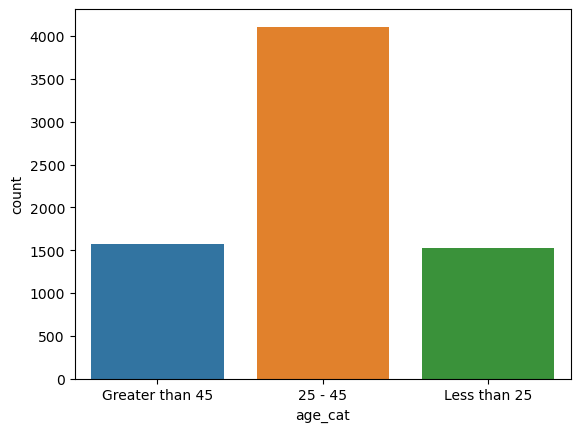

In [5]:
#C5

import matplotlib.pyplot as plt

sns.countplot(x=df['age_cat'])

<AxesSubplot:xlabel='age', ylabel='Count'>

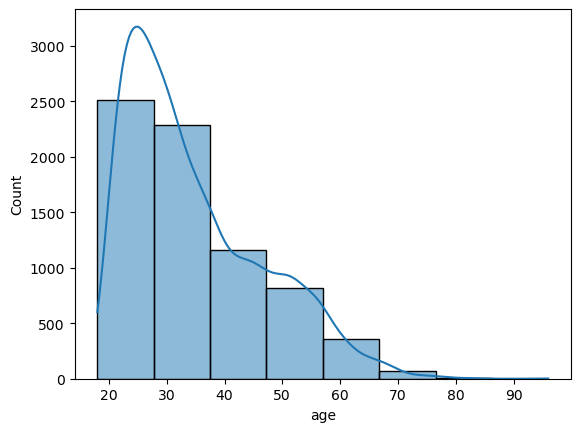

In [6]:
#C6

sns.histplot(data=df, x="age", kde=True, bins=8)

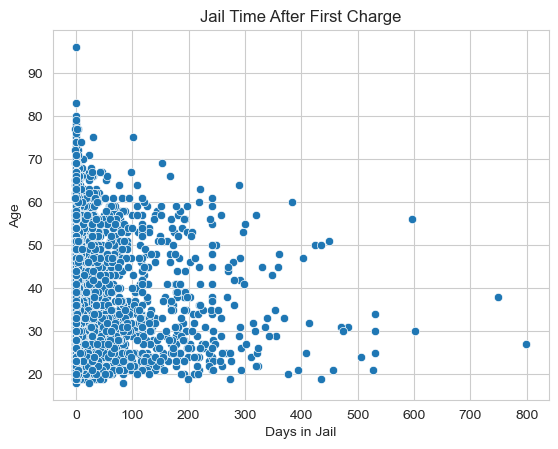

In [7]:
#C7

df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])

df['days_in_jail'] = (df['c_jail_out'] - df['c_jail_in']).dt.days

sns.set_style("whitegrid")
sns.scatterplot(x='days_in_jail', y='age', data=df)

plt.title('Jail Time After First Charge')
plt.xlabel('Days in Jail')
plt.ylabel('Age')

plt.show()

In [8]:
#C8P1

df['race'].unique()

array(['Other', 'African-American', 'Caucasian', 'Hispanic',
       'Native American', 'Asian'], dtype=object)

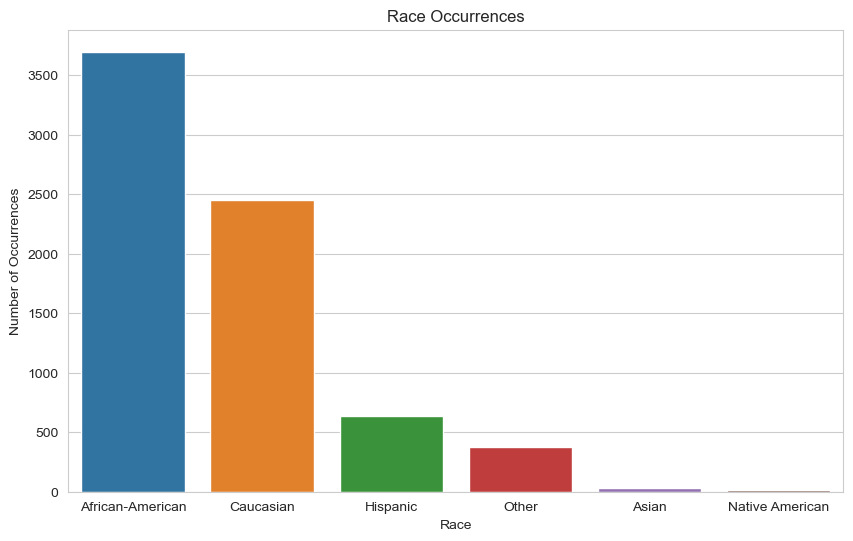

In [9]:
#C8P2

race_counts = df['race'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=race_counts.index, y=race_counts.values)

plt.title('Race Occurrences')
plt.xlabel('Race')
plt.ylabel('Number of Occurrences')

plt.show()

<AxesSubplot:xlabel='decile_score', ylabel='count'>

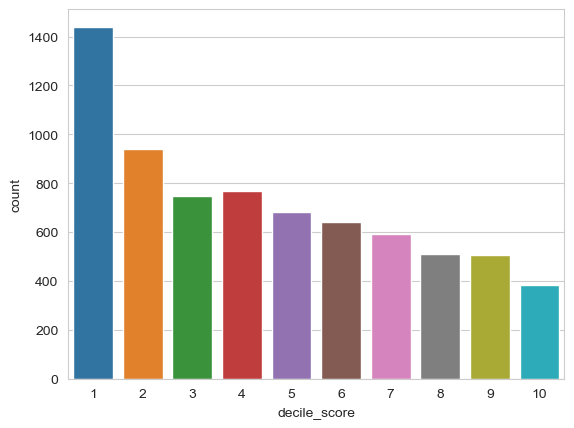

In [10]:
#C9

sns.countplot(x='decile_score', data=df)

<AxesSubplot:xlabel='decile_score', ylabel='count'>

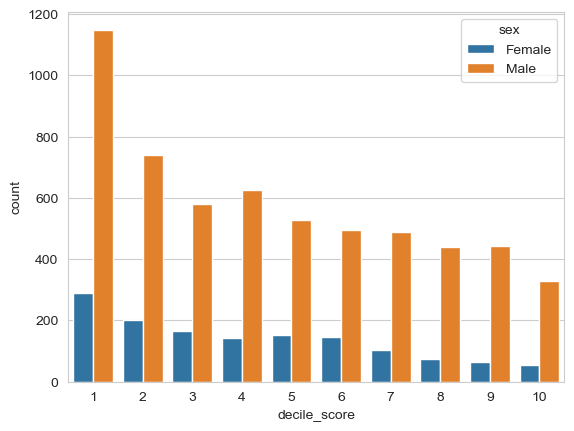

In [11]:
#C10

score_counts = df.groupby(['sex', 'decile_score']).size().reset_index(name='count')

sns.barplot(x='decile_score', y='count', hue='sex', data=score_counts)

<AxesSubplot:xlabel='decile_score', ylabel='age'>

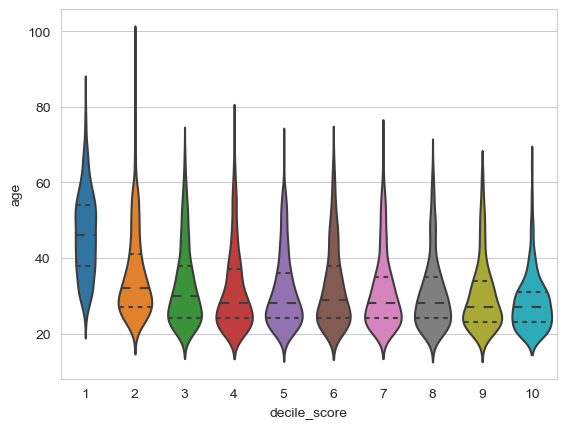

In [12]:
#C11

sns.violinplot(x='decile_score', y='age', data=df, inner='quart')

In [13]:
#bonus

# Assuming you have a DataFrame named "df"
filtered_df = df[(df['sex'] == 'Female') & (df['age'] > 70)]

# Print the values from the specified columns
for index, row in filtered_df.iterrows():
    print("c_charge_desc:", row['c_charge_desc'])
    print("name:", row['name'])
    print("decile_score:", row['decile_score'])
    print("-------------")  # Separator for each row


c_charge_desc: arrest case no charge
name: catherine blackwood
decile_score: 1
-------------
c_charge_desc: Felony Petit Theft
name: merdis johnson
decile_score: 1
-------------
c_charge_desc: Disorderly Intoxication
name: eileen dunn
decile_score: 1
-------------


<AxesSubplot:xlabel='decile_score', ylabel='race'>

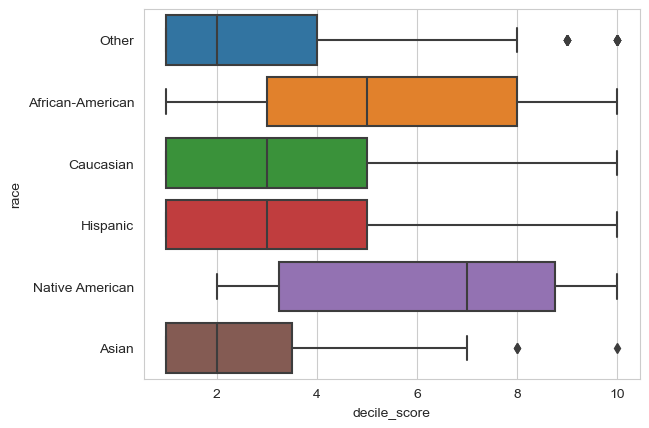

In [18]:
#C12

sns.boxplot(data=df, x="decile_score", y="race")

<AxesSubplot:xlabel='decile_score', ylabel='days_in_jail'>

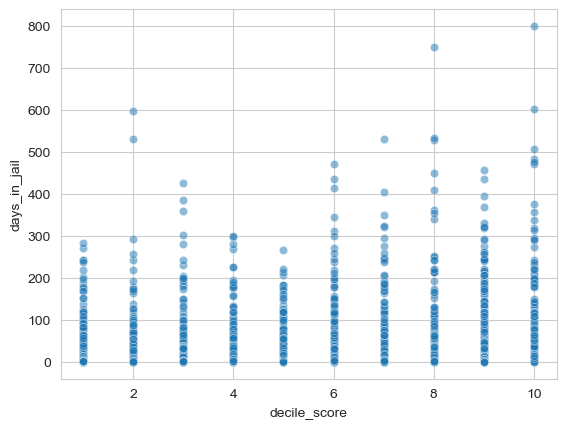

In [19]:
#C13

sns.scatterplot(x='decile_score', y='days_in_jail', data=df, alpha=0.5)

<AxesSubplot:>

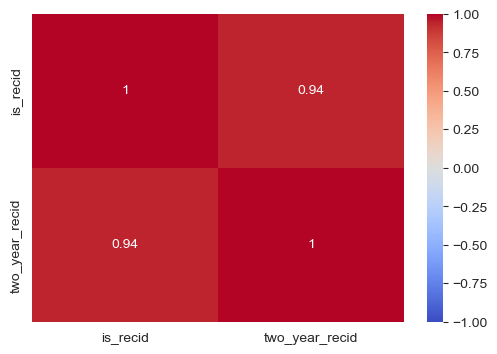

In [22]:
#C14

corr_matrix = df[['is_recid', 'two_year_recid']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)